<a href="https://colab.research.google.com/github/nour-awad/MATH-307/blob/main/root_finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return np.exp(-x) - x

def f_prime(x):
    return -np.exp(-x) - 1

true_root = 0.56714329 # True root

# **BISECTION**

In [ ]:
def bisection_method(x1, xu, es, imax):
    iter = 0
    f1 = f(x1)
    xr = x1
    ea = 100
    errors = []

    while True:
        xrold = xr
        xr = (x1 + xu) / 2
        fr = f(xr)
        iter += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        test = f1 * fr
        if test < 0:
            xu = xr
        elif test > 0:
            x1 = xr
            f1 = fr
        else:
            ea = 0

        et = abs((true_root - xr) / true_root) * 100
        errors.append(et)

        if ea < es or iter >= imax:
            break

    return errors

# **FALSE POSITION**

In [ ]:
def mod_false_position(x1, xu, es, imax):
    iter = 0
    f1 = f(x1)
    fu = f(xu)
    xr = x1
    ea = 100
    i1 = 0
    iu = 0
    errors = []

    while True:
        xrold = xr
        xr = xu - fu * (x1 - xu) / (f1 - fu)
        fr = f(xr)
        iter += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        test = f1 * fr
        if test < 0:
            xu = xr
            fu = f(xu)
            iu = 0
            i1 += 1
            if i1 >= 2:
                f1 /= 2
        elif test > 0:
            x1 = xr
            f1 = f(x1)
            i1 = 0
            iu += 1
            if iu >= 2:
                fu /= 2
        else:
            ea = 0

        et = abs((true_root - xr) / true_root) * 100
        errors.append(et)

        if ea < es or iter >= imax:
            break

    return errors

# **SECANT**

In [ ]:
def secant_method(x0, x1, es, imax):
    iter = 0
    xr = x1
    ea = 100
    errors = []

    while True:
        xrold = xr
        xr = x1 - f(x1) * (x0 - x1) / (f(x0) - f(x1))
        iter += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        et = abs((true_root - xr) / true_root) * 100
        errors.append(et)

        if ea < es or iter >= imax:
            break

        x0 = x1
        x1 = xr

    return errors

# **NEWTON-RAPHSON**

In [ ]:
def newton_raphson(x0, es, imax):
    iter = 0
    xr = x0
    ea = 100
    errors = []

    while True:
        xrold = xr
        xr = x0 - f(x0) / f_prime(x0)
        iter += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        et = abs((true_root - xr) / true_root) * 100
        errors.append(et)

        if ea < es or iter >= imax:
            break

        x0 = xr

    return errors

# **MAIN**

In [ ]:
x1 = 0
xu = 1
es = 0.0001
imax = 20

errors_bisection = bisection_method(x1, xu, es, imax)
errors_mod_false_pos = mod_false_position(x1, xu, es, imax)
errors_secant = secant_method(x1, xu, es, imax)
errors_newton_raphson = newton_raphson(x1, es, imax)

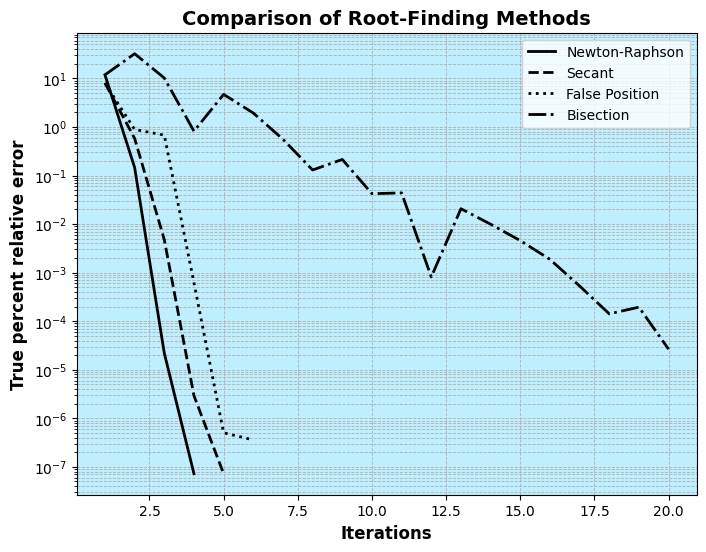

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('#BFEFFF')

ax.plot(range(1, len(errors_newton_raphson) + 1), errors_newton_raphson, label="Newton-Raphson", color='black', linewidth=2)
ax.plot(range(1, len(errors_secant) + 1), errors_secant, label="Secant", color='black', linestyle='dashed', linewidth=2)
ax.plot(range(1, len(errors_mod_false_pos) + 1), errors_mod_false_pos, label="False Position", color='black', linestyle='dotted', linewidth=2)
ax.plot(range(1, len(errors_bisection) + 1), errors_bisection, label="Bisection", color='black', linestyle='dashdot', linewidth=2)

ax.set_yscale("log")
ax.set_xlabel("Iterations", fontsize=12, fontweight='bold')
ax.set_ylabel("True percent relative error", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Root-Finding Methods", fontsize=14, fontweight='bold')

ax.grid(True, which="both", linestyle="--", linewidth=0.6)
ax.legend()
plt.show()